# Recognizing Handwritten Digits with Python 

## Importing Required Library

In [50]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Dataset from openml

<b>Dataset link ----- <a href='https://www.openml.org/d/554'>Click Here</a> </b>
                 

In [11]:
mnist = fetch_openml('mnist_784')

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\datasets\_openml.py:57: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [17]:
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
mnist.target[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

Plotting actual label using matplotlib

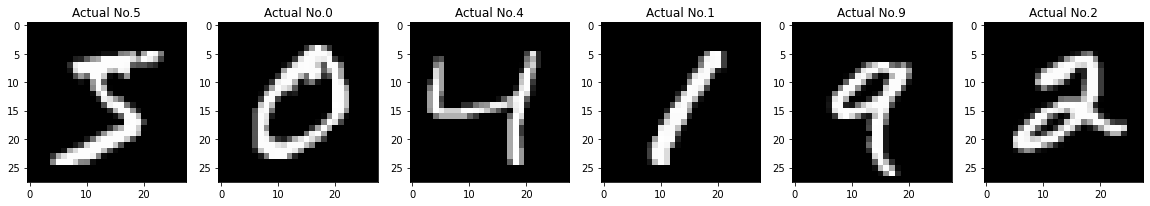

In [29]:
plt.figure(figsize=(20,5))
for index, (image,label) in enumerate(zip(mnist.data[:6], mnist.target[:6])):
    plt.subplot(1, 6, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Actual No.%s" % label)

Splitting data into train and test measuring prediction score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2) 

In [37]:
mdl = LogisticRegression(solver="lbfgs")
mdl.fit(X_train,y_train)
prediction = mdl.predict(X_test)
score = mdl.score(X_test, y_test) 
print(score)

0.923


C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


prediction: 6


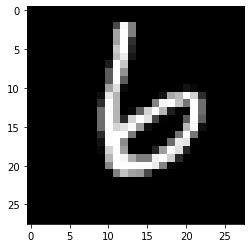

In [90]:
index = 3
plt.imshow(np.reshape(X_test[index],(28,28)), cmap = "gray")
print("prediction: " + mdl.predict([X_test[index]])[0])

Confusion matrix value and visualization

In [53]:
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[1316,    1,    3,    4,    5,   10,    6,    2,    7,    2],
       [   1, 1525,    3,    7,    2,    4,    2,    2,   17,    4],
       [   6,   18, 1289,   29,   13,    5,   22,   17,   39,    8],
       [   5,    3,   31, 1314,    0,   37,    1,   11,   33,   17],
       [   3,    3,    7,    3, 1309,    2,   15,    3,   11,   48],
       [  14,    5,    7,   45,   10, 1072,   29,    7,   43,   17],
       [   7,    3,    8,    1,    7,   15, 1259,    1,    7,    1],
       [   4,    4,   19,   13,   16,    2,    0, 1360,    3,   47],
       [   5,   20,   10,   33,    9,   46,   12,    4, 1206,   14],
       [   7,    5,    4,   18,   31,    6,    1,   39,    7, 1272]],
      dtype=int64)

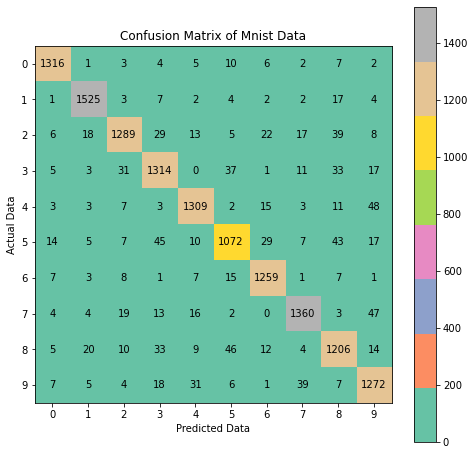

In [84]:
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap="Set2")

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.colorbar()

plt.title("Confusion Matrix of Mnist Data")

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center',verticalalignment='center')